In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from pandas_datareader import data as pdr

In [2]:
df_2 = pd.read_csv('szereg_czasowy.csv', sep=";")

df_2 = df_2.dropna(subset=['retail_price'])
df_2 = df_2.reset_index(drop=True)
df_2 = df_2.sort_values(by='year')
df_2 = df_2.replace(',', '.')

df_2

,set_num,name_sets,year,theme_id,num_parts,img_url,name_themes,retail_price,sty.21,lut.21,...,mar.23,kwi.23,maj.23,cze.23,lip.23,sie.23,wrz.23,paź.23,lis.23,gru.23
0,5289-1,Toggle Joints & Connectors,1996,453,64,https://cdn.rebrickable.com/media/sets/5289-1.jpg,Technic,3.95,9.30,8.87,...,9.31,8.08,7.91,6.83,8.43,7.91,6.32,8.13,7.91,7.01
1,7121-1,Naboo Swamp,1999,158,82,https://cdn.rebrickable.com/media/sets/7121-1.jpg,Star Wars,8.79,60.92,56.85,...,72.70,58.29,71.98,91.15,79.82,70.74,85.92,91.52,71.70,66.79
2,7111-1,Droid Fighter,1999,158,62,https://cdn.rebrickable.com/media/sets/7111-1.jpg,Star Wars,5.27,28.77,27.33,...,46.50,54.41,42.72,48.57,42.17,56.06,47.54,41.01,50.64,39.90
3,7171-1,Mos Espa Podrace,1999,158,907,https://cdn.rebrickable.com/media/sets/7171-1.jpg,Star Wars,79.19,275.43,327.97,...,333.09,304.65,323.50,339.89,334.51,433.46,367.34,431.05,375.69,349.02
4,7104-1,Desert Skiff,2000,158,55,https://cdn.rebrickable.com/media/sets/7104-1.jpg,Star Wars,5.27,66.64,46.98,...,64.62,62.74,68.10,77.60,66.18,64.22,79.69,74.27,65.38,59.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,70687-1,Spinjitzu Burst Lloyd,2020,435,48,https://cdn.rebrickable.com/media/sets/70687-1...,Ninjago,9.99,12.13,12.14,...,11.17,12.02,12.24,13.46,12.38,13.85,11.86,14.15,11.65,12.38
91,41398-1,4+ Stephanie's House,2020,494,170,https://cdn.rebrickable.com/media/sets/41398-1...,Friends,39.99,43.80,43.74,...,43.15,45.71,43.49,36.80,43.88,47.77,42.73,39.59,44.69,37.35
92,40425-1,Nutcracker,2020,610,180,https://cdn.rebrickable.com/media/sets/40425-1...,Brickheadz,9.99,12.64,12.66,...,12.49,14.17,12.27,12.28,14.49,12.78,12.59,14.49,12.59,13.00
93,71361-5,Bullet Bill,2020,690,25,https://cdn.rebrickable.com/media/sets/71361-5...,Super Mario,3.89,19.50,19.44,...,19.08,18.62,17.95,16.12,20.23,17.91,16.38,16.28,18.34,17.88


In [3]:
average_values = df_2.iloc[:, 8:].apply(lambda x: x.mean(), axis=0)
average_values_list = average_values.tolist()

average_values_rounded = [round(x, 6) for x in average_values_list]

average_values_rounded_series = pd.Series(average_values_rounded, name='average_values_rounded')
average_values_rounded_series.name = 'average_values_rounded'
df_2['average_values_rounded'] = average_values_rounded_series

LEGO_basket = pd.DataFrame(average_values_rounded_series)

[*********************100%%**********************]  4 of 4 completed


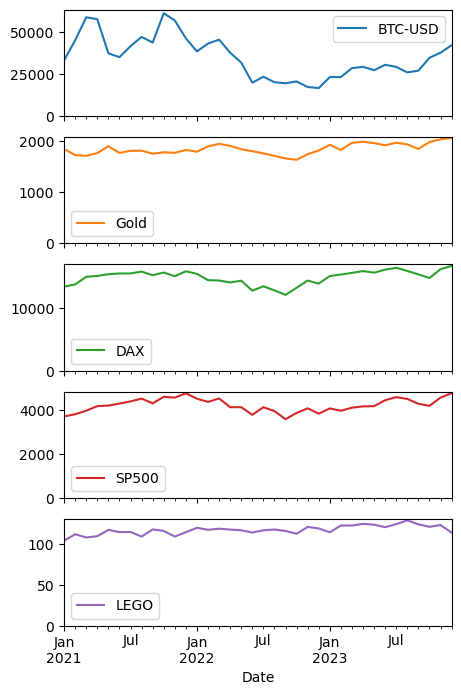

In [4]:
yf.pdr_override()
other_instruments = pdr.get_data_yahoo(["GC=F", "^GSPC", "^GDAXI", "BTC-USD"], start="2021-01-01", end="2023-12-31")
other_instruments = other_instruments.resample('M').last()
other_instruments = other_instruments['Close']
other_instruments = other_instruments.reset_index()

#merge LEGO_basket and other_investments
all_instruments = pd.concat([other_instruments, LEGO_basket], axis=1)
all_instruments= all_instruments.rename(columns={'GC=F': 'Gold', '^GSPC': 'SP500', 'WIG20.WA': 'WIG20', '^GDAXI': 'DAX','average_values_rounded': 'LEGO'})

#Set 'Date' as index
all_instruments.set_index("Date", inplace=True)
all_instruments.plot(figsize=(5,8), subplots=True)

# Set the minimum value on the y-axis to 0 for all subplots
for ax in plt.gcf().get_axes():
    ax.set_ylim(bottom=0)

plt.show()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

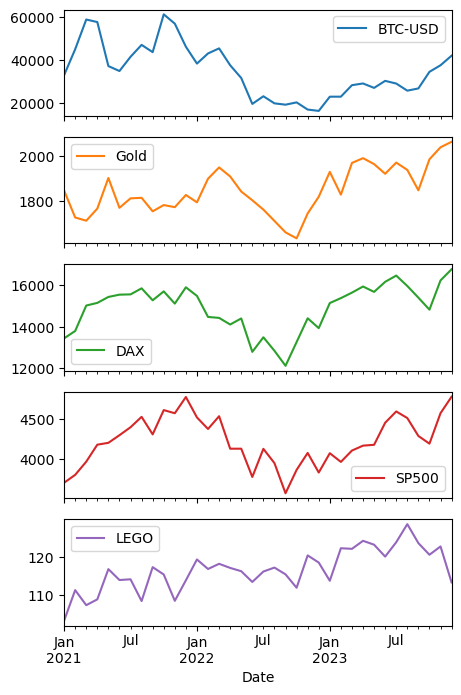

In [5]:
all_instruments.plot(figsize=(5,8), subplots=True)

In [6]:
all_instruments.tail()

,BTC-USD,Gold,DAX,SP500,LEGO
Date,,,,,
2023-08-31,25931.472656,1938.199951,15947.080078,4507.660156,128.371875
2023-09-30,26967.916016,1848.099976,15386.580078,4288.049805,123.486562
2023-10-31,34667.781250,1985.199951,14810.339844,4193.799805,120.485208
2023-11-30,37712.746094,2038.099976,16215.429688,4567.799805,122.621667
2023-12-31,42156.902344,2062.399902,16751.640625,4769.830078,113.352917


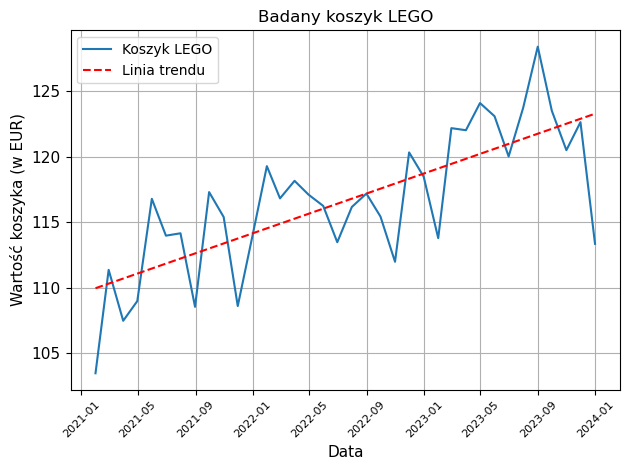

In [7]:
x = all_instruments.index.to_numpy()
y = all_instruments['LEGO'].to_numpy()

# Convert the datetime64 array to a Unix timestamp array
x_unix_timestamps = (x - np.datetime64('1970-01-01')) / np.timedelta64(1)

# Fit a polynomial of degree 1 (a straight line) to the data
fit = np.polyfit(x_unix_timestamps, y, 1)

# Generate the equation of the fit line
fit_line = np.poly1d(fit)

# Plot the original data
plt.plot(x, y, label='Koszyk LEGO')

# Plot the fit line
plt.plot(x, fit_line(x_unix_timestamps), 'r--', label='Linia trendu')

# Show the plot
plt.title('Badany koszyk LEGO')
plt.xticks(fontsize=8)
plt.yticks(fontsize=11)
plt.ylabel('Wartość koszyka (w EUR)', fontsize=11)
plt.xlabel('Data', fontsize=11)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

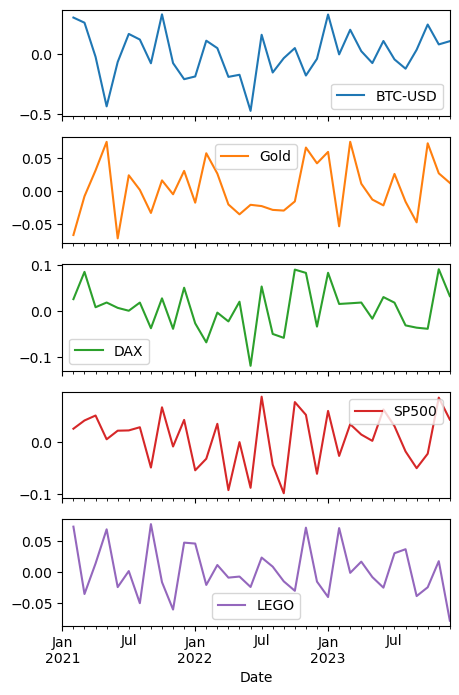

In [8]:
#PCT change
instruments = ['BTC-USD', 'Gold', 'DAX', 'SP500', 'LEGO']
price_change = np.log(all_instruments[instruments] / all_instruments[instruments].shift(1))
price_change.plot(figsize=(5,8), subplots=True)

In [9]:
#Calculate std of returns of each column
std_dev = price_change.std()
std_dev

BTC-USD    0.193572
Gold       0.040213
DAX        0.048672
SP500      0.051335
LEGO       0.040508
dtype: float64

In [10]:
#Coefficient of Variation
COV = (all_instruments.std()/all_instruments.mean())*100
COV

BTC-USD    35.462637
Gold        5.724456
DAX         7.533373
SP500       7.115718
LEGO        4.645575
dtype: float64

In [11]:
def drawdown(price_change):
    price_change.fillna(0.0, inplace=True)
    cumulative = (price_change + 1).cumprod()
    running_max = np.maximum.accumulate(cumulative)

    return (cumulative - running_max) / running_max

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

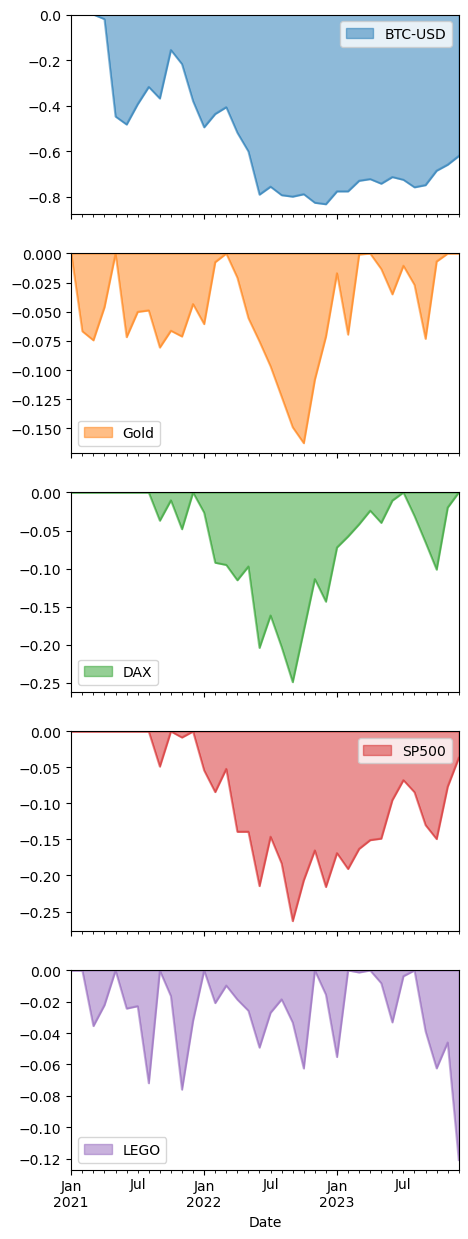

In [12]:
drawdown(price_change).plot(kind="area", alpha=0.5, subplots=True, figsize=(5,15))

In [13]:
assets = ['BTC-USD', 'Gold', 'DAX', 'SP500', 'LEGO']
for asset in assets:
    md = np.min(drawdown(price_change[asset]))
    print(f'Maximum drawdown for {asset} was {np.min(drawdown(price_change[asset]))}')

Maximum drawdown for BTC-USD was -0.8322483581393616
Maximum drawdown for Gold was -0.16271945955897366
Maximum drawdown for DAX was -0.24884440496839694
Maximum drawdown for SP500 was -0.26328809295171035
Maximum drawdown for LEGO was -0.12095503455753037


In [14]:
#read csv file
liquidity = pd.read_csv('liquidity.csv', sep=";") 
float(liquidity['num_of_sales_in_2023'].dropna().mean())

118.48958333333333